Netflix Movies and TV Shows

In [40]:
! pip install geopandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Gymnasiet\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd

# Load the dataset

data = pd.read_csv(r'C:\Users\Gymnasiet\floeder for python\data-hw-bipinsebastian\projects\project final\netflix_titles.csv')

# Display the first few rows of the dataset
print(data.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Data -Listings of movies and tv shows on Netflix - Regularly Updated

                                 TASK:2

A list of at least 6 graphs you want to create from the dataset
 


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset

netflix_data = data

# Basic cleanup and preview of data
netflix_data.dropna(inplace=True)
print(netflix_data.head())



# Basic cleanup and preview of data
netflix_data.dropna(inplace=True)
print(netflix_data.head())


   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdo

In [43]:

# Display the column names
print(netflix_data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


1. Line Graph of Content Releases Over Time

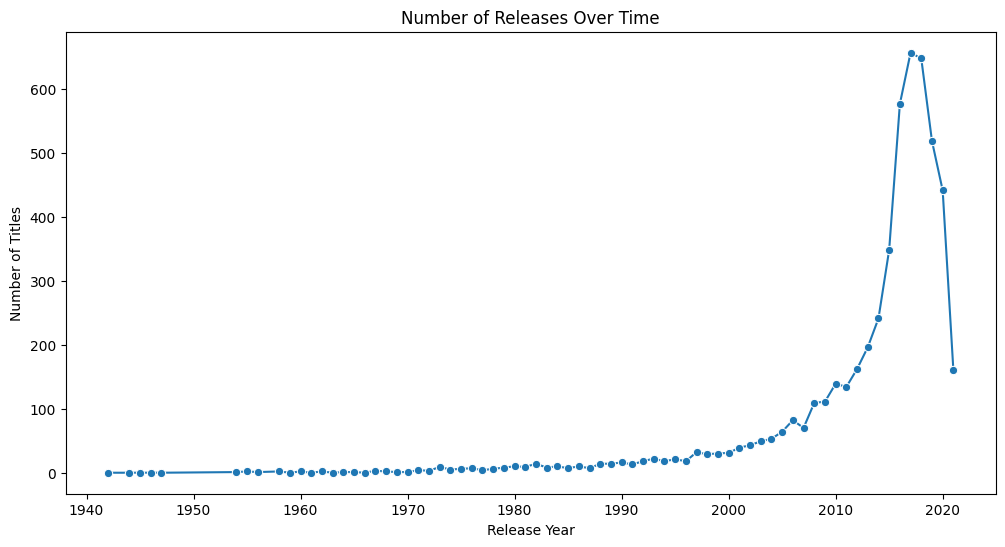

In [44]:
# Content releases by year
plt.figure(figsize=(12,6))
release_counts = netflix_data['release_year'].value_counts().sort_index()
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
plt.title('Number of Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


2.Top 10 directors with the most titles-Top 10 Directors/Actors Bar Chart

C:\Users\Gymnasiet\AppData\Local\Temp\ipykernel_28452\1264049175.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




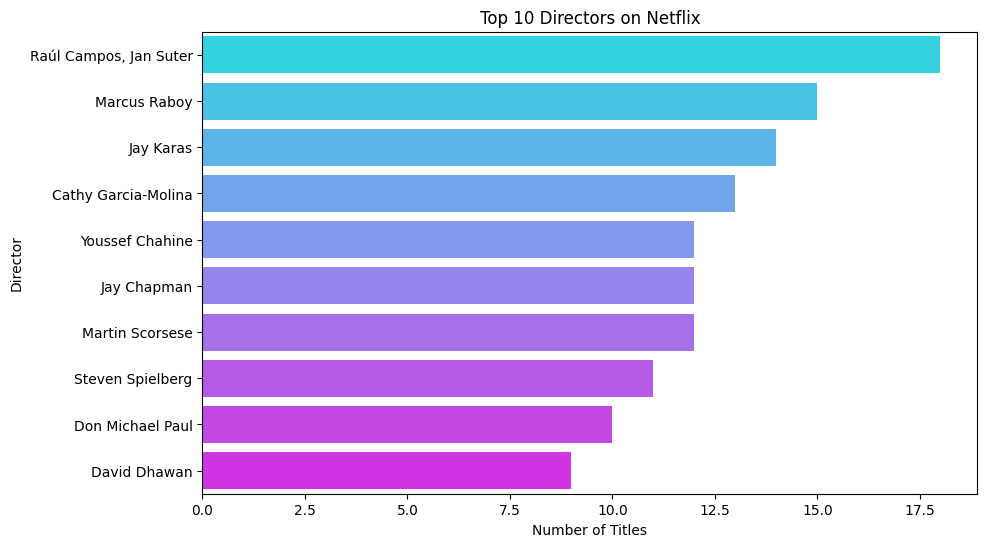

In [45]:
# Top 10 directors with the most titles
plt.figure(figsize=(10,6))
top_directors = netflix_data['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


3.pie chart -Distribution of content by country (Top 5 countries)

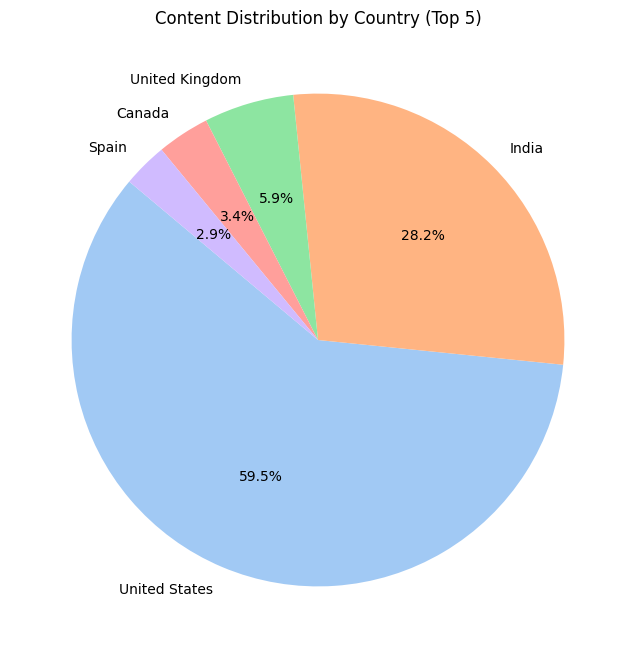

In [46]:
# Distribution of content by country (Top 5 countries)
plt.figure(figsize=(8,8))
country_counts = netflix_data['country'].value_counts().head(5)
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Content Distribution by Country (Top 5)')
plt.show()


4.Histogram of movie duration

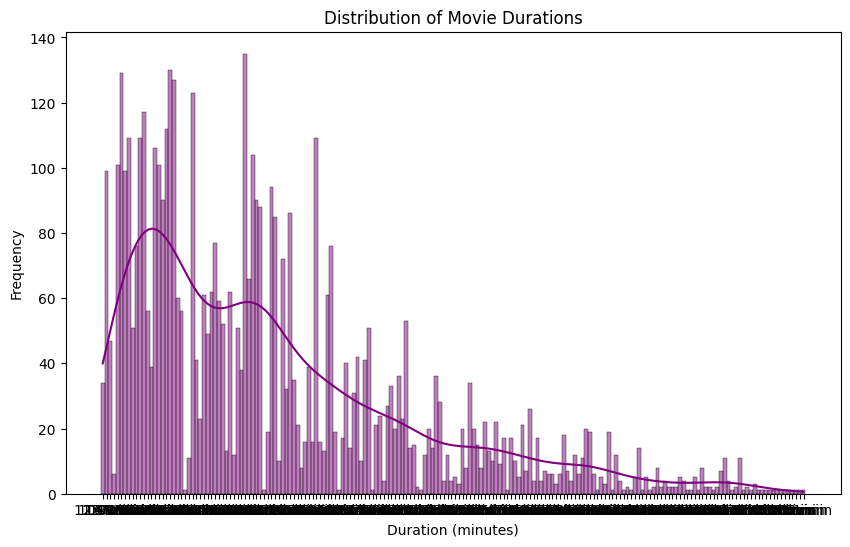

In [47]:
# Histogram of movie duration
plt.figure(figsize=(10,6))
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']  # Filter for movies
sns.histplot(netflix_movies['duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


5.Basic map to show content distribution by country

In [48]:
import geopandas as gpd
import plotly.express as px

# Basic map to show content distribution by country
country_counts = netflix_data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(country_counts, locations='country', locationmode='country names', color='count',
                    color_continuous_scale="Viridis", title='Netflix Content Distribution by Country')
fig.show()


6. Create a box plot of ratings by cast member

C:\Users\Gymnasiet\AppData\Local\Temp\ipykernel_28452\278116212.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




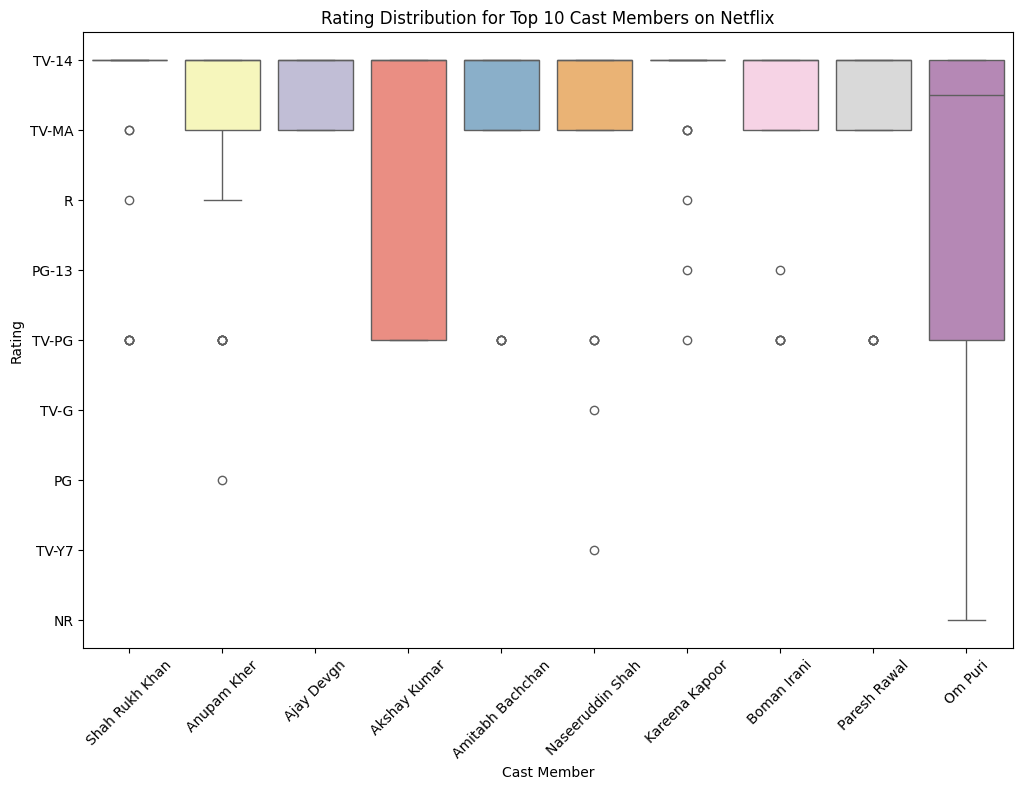

In [49]:
# Drop any NaNs for simplicity
netflix_data = netflix_data[['title', 'rating', 'cast']].dropna()

# Split each cast member and create an expanded DataFrame
cast_df = netflix_data.assign(cast=netflix_data['cast'].str.split(',')).explode('cast')
cast_df['cast'] = cast_df['cast'].str.strip()  # Remove any leading/trailing spaces

# Filter to top 10 most frequent cast members
top_cast = cast_df['cast'].value_counts().nlargest(10).index
top_cast_df = cast_df[cast_df['cast'].isin(top_cast)]

# Create a box plot of ratings by cast member
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_cast_df, x='cast', y='rating', palette='Set3')
plt.xticks(rotation=45)
plt.title('Rating Distribution for Top 10 Cast Members on Netflix')
plt.xlabel('Cast Member')
plt.ylabel('Rating')
plt.show()